<a href="https://colab.research.google.com/github/rohanpaul98/Waterquality-Asessment-using-machine-learning/blob/master/IoT_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [ ]:
#importing the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split

# Model imports
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import KFold, GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold

from sklearn.linear_model import RidgeClassifier

from sklearn.ensemble import RandomForestClassifier

from imblearn.combine import SMOTETomek
from collections import Counter

from imblearn.ensemble import EasyEnsembleClassifier

from sklearn.ensemble import AdaBoostClassifier

import xgboost

%matplotlib inline

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
dataframe = pd.read_csv('/content/gdrive/MyDrive/water_potability.csv', encoding='utf-8')

In [ ]:
dataframe.head(15)

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
5,5.584087,188.313324,28748.687739,7.544869,326.678363,280.467916,8.399735,54.917862,2.559708,0
6,10.223862,248.071735,28749.716544,7.513408,393.663396,283.651634,13.789695,84.603556,2.672989,0
7,8.635849,203.361523,13672.091764,4.563009,303.309771,474.607645,12.363817,62.798309,4.401425,0
8,NaN,118.988579,14285.583854,7.804174,268.646941,389.375566,12.706049,53.928846,3.595017,0
9,11.180284,227.231469,25484.508491,9.077200,404.041635,563.885481,17.927806,71.976601,4.370562,0


In [ ]:
print("Number of null values")
dataframe.isnull().sum()

Number of null values


ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [ ]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [ ]:
dataframe.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


<Figure size 1440x1440 with 0 Axes>

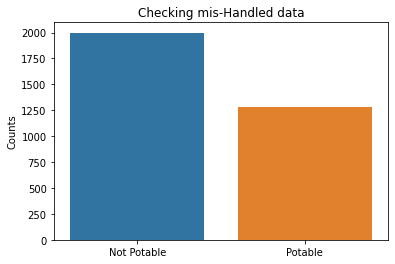

<Figure size 1440x1440 with 0 Axes>

In [ ]:
sns.barplot(x=['Not Potable', 'Potable'], y=dataframe['Potability'].value_counts())
plt.ylabel('Counts')
plt.title('Checking mis-Handled data')
plt.figure(figsize=(20,20))

In [ ]:
basic_water = []
acidic_water = []
for x in dataframe['ph'] :
  if(x>7.0):
    basic_water.append(x)
  if(x<7.0):
    acidic_water.append(x)

In [ ]:
acidic_water_counts = len(acidic_water)
basic_water_counts = len(basic_water)

In [ ]:
# removing Null values
dataframe.interpolate(method="linear", axis=1, inplace=True)

In [ ]:
# dataframe.isnull().sum()
dataframe['ph'].interpolate(method="linear", inplace=True)

In [ ]:
dataframe.drop(index=0, inplace=True)

In [ ]:
df_basic = dataframe.loc[((dataframe['ph']>7.0) == True)]
df_acidic = dataframe.loc[((dataframe['ph']<7.0)==True)]

<Figure size 1440x1440 with 0 Axes>

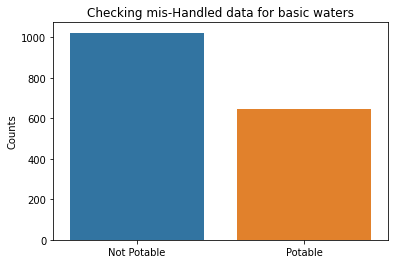

<Figure size 1440x1440 with 0 Axes>

In [ ]:
sns.barplot(x=['Not Potable', 'Potable'], y=df_basic['Potability'].value_counts())
plt.ylabel('Counts')
plt.title('Checking mis-Handled data for basic waters')
plt.figure(figsize=(20,20))

<Figure size 1440x1440 with 0 Axes>

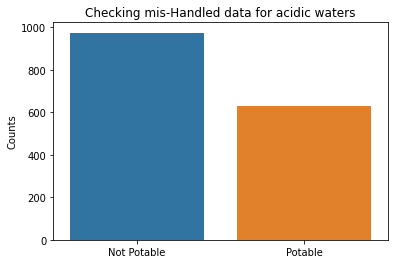

<Figure size 1440x1440 with 0 Axes>

In [ ]:
sns.barplot(x=['Not Potable', 'Potable'], y=df_acidic['Potability'].value_counts())
plt.ylabel('Counts')
plt.title('Checking mis-Handled data for acidic waters')
plt.figure(figsize=(20,20))

Text(0.5, 1.0, 'Basic Waters and Hardness level Distribution')

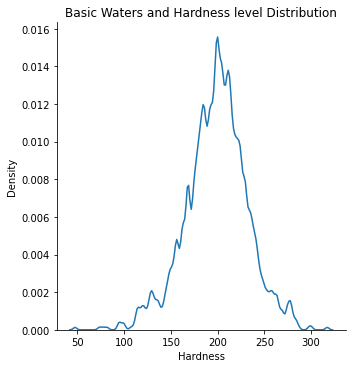

In [ ]:
sns.displot(df_basic, x="Hardness", kind="kde", bw_adjust=.25)
plt.title('Basic Waters and Hardness level Distribution')

Text(0.5, 1.0, 'Basic Waters and Solids level Distribution')

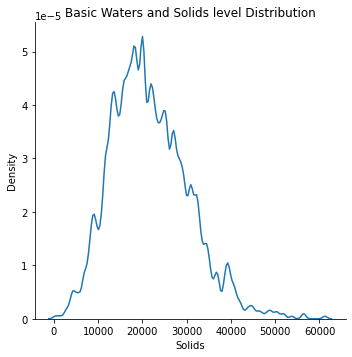

In [ ]:
sns.displot(df_basic, x="Solids", kind="kde", bw_adjust=.25)
plt.title('Basic Waters and Solids level Distribution')

Text(0.5, 1.0, 'Basic Waters and Conductivity level Distribution')

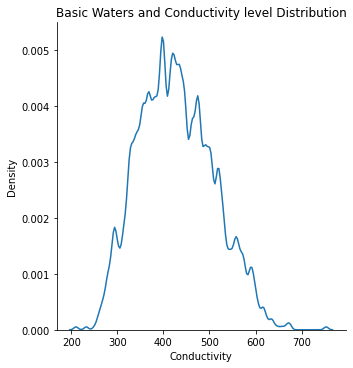

In [ ]:
sns.displot(df_basic, x="Conductivity", kind="kde", bw_adjust=.25)
plt.title('Basic Waters and Conductivity level Distribution')

Text(0.5, 1.0, 'Basic Waters and Turbidity level Distribution')

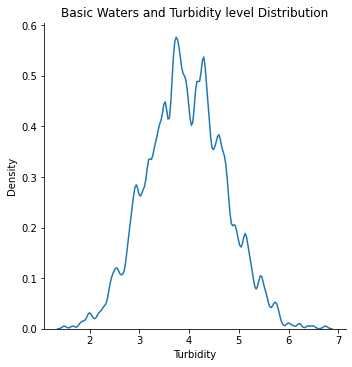

In [ ]:
sns.displot(df_basic, x="Turbidity", kind="kde", bw_adjust=.25)
plt.title('Basic Waters and Turbidity level Distribution')

Text(0.5, 1.0, 'Acidic Waters and Hardness level Distribution')

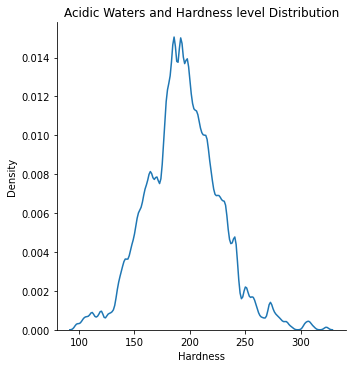

In [ ]:
sns.displot(df_acidic, x="Hardness", kind="kde", bw_adjust=.25)
plt.title('Acidic Waters and Hardness level Distribution')

Text(0.5, 1.0, 'Acidic Waters and Turbidity level Distribution')

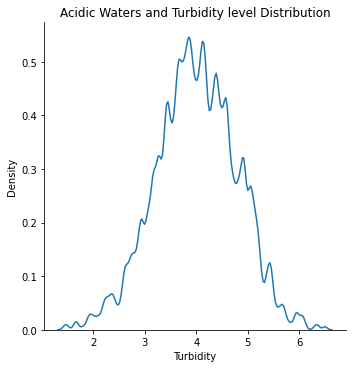

In [ ]:
sns.displot(df_acidic, x="Turbidity", kind="kde", bw_adjust=.25)
plt.title('Acidic Waters and Turbidity level Distribution')

Text(0.5, 1.0, 'Acidic Waters and Conductivity level Distribution')

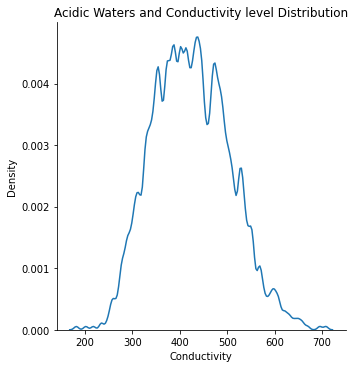

In [ ]:
sns.displot(df_acidic, x="Conductivity", kind="kde", bw_adjust=.25)
plt.title('Acidic Waters and Conductivity level Distribution')

Text(0.5, 1.0, 'Acidic Waters and Turbidity level Distribution')

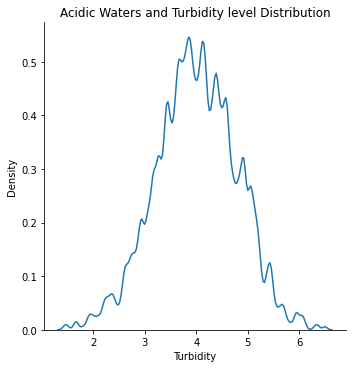

In [ ]:
sns.displot(df_acidic, x="Turbidity", kind="kde", bw_adjust=.25)
plt.title('Acidic Waters and Turbidity level Distribution')

<Figure size 720x720 with 0 Axes>

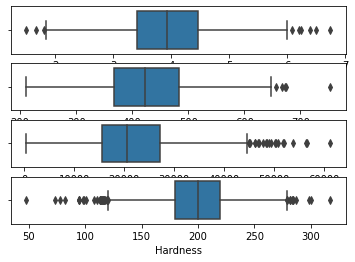

In [ ]:
plt.figure(figsize=(10,10))
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1)
sns.boxplot(x=df_basic['Turbidity'], ax=ax1)
sns.boxplot(x=df_basic['Conductivity'], ax=ax2)
sns.boxplot(x=df_basic['Solids'], ax=ax3)
sns.boxplot(x=df_basic['Hardness'], ax=ax4)

<Figure size 720x720 with 0 Axes>

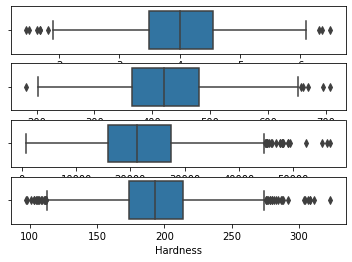

In [ ]:
plt.figure(figsize=(10,10))
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1)
sns.boxplot(x=df_acidic['Turbidity'], ax=ax1)
sns.boxplot(x=df_acidic['Conductivity'], ax=ax2)
sns.boxplot(x=df_acidic['Solids'], ax=ax3)
sns.boxplot(x=df_acidic['Hardness'], ax=ax4)

In [ ]:
Q1 = df_basic.quantile(0.25)
Q3 = df_basic.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

ph                     1.283632
Hardness              39.807526
Solids             11682.681864
Chloramines            1.967305
Sulfate               81.710227
Conductivity         115.138647
Organic_carbon         4.341413
Trihalomethanes       23.208020
Turbidity              1.056863
Potability             1.000000
dtype: float64


In [ ]:
print((df_basic < (Q1 - 1.5 * IQR))&(df_basic > (Q3 + 1.5 * IQR)))

         ph  Hardness  Solids  Chloramines  Sulfate  Conductivity  \
2     False     False   False        False    False         False   
3     False     False   False        False    False         False   
4     False     False   False        False    False         False   
6     False     False   False        False    False         False   
7     False     False   False        False    False         False   
...     ...       ...     ...          ...      ...           ...   
3267  False     False   False        False    False         False   
3269  False     False   False        False    False         False   
3272  False     False   False        False    False         False   
3273  False     False   False        False    False         False   
3275  False     False   False        False    False         False   

      Organic_carbon  Trihalomethanes  Turbidity  Potability  
2              False            False      False       False  
3              False            False      Fa

In [ ]:
Q1 = df_acidic.quantile(0.25)
Q3 = df_acidic.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

ph                     1.198201
Hardness              40.723829
Solids             11522.229785
Chloramines            2.020912
Sulfate               82.690116
Conductivity         116.406814
Organic_carbon         4.579192
Trihalomethanes       22.848089
Turbidity              1.061742
Potability             1.000000
dtype: float64


In [ ]:
print((df_acidic < (Q1 - 1.5 * IQR))&(df_acidic > (Q3 + 1.5 * IQR)))

         ph  Hardness  Solids  Chloramines  Sulfate  Conductivity  \
1     False     False   False        False    False         False   
5     False     False   False        False    False         False   
15    False     False   False        False    False         False   
21    False     False   False        False    False         False   
22    False     False   False        False    False         False   
...     ...       ...     ...          ...      ...           ...   
3264  False     False   False        False    False         False   
3268  False     False   False        False    False         False   
3270  False     False   False        False    False         False   
3271  False     False   False        False    False         False   
3274  False     False   False        False    False         False   

      Organic_carbon  Trihalomethanes  Turbidity  Potability  
1              False            False      False       False  
5              False            False      Fa

In [ ]:
y = dataframe['Potability']
X = dataframe.drop(['Potability'], axis=1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

In [ ]:
# Only Solids Column has to be scaled

X_train = RobustScaler().fit_transform(X_train)
X_test = RobustScaler().fit_transform(X_test)

In [ ]:
# Logistic Regression
log_class = LogisticRegression()
grid={'C':10.0**np.arange(-2,3), 'penalty':['l1', 'l2']}
cv=KFold(n_splits=5, shuffle=False, random_state=None)

In [ ]:
clf=GridSearchCV(log_class, grid, cv=cv,n_jobs=-1,scoring='f1_macro')
clf.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02]),
                         'penalty': ['l1', 'l2']},
             scoring='f1_macro')

In [ ]:
y_pred=clf.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[403   0]
 [252   0]]
0.6152671755725191
              precision    recall  f1-score   support

         0.0       0.62      1.00      0.76       403
         1.0       0.00      0.00      0.00       252

    accuracy                           0.62       655
   macro avg       0.31      0.50      0.38       655
weighted avg       0.38      0.62      0.47       655



In [ ]:
model = RandomForestClassifier()
n_estimators = [10]
max_features = ['sqrt', 'log2']

In [ ]:
# define grid search
grid = dict(n_estimators=n_estimators,max_features=max_features)

In [ ]:
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

In [ ]:
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_train, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.623155 using {'max_features': 'log2', 'n_estimators': 10}


In [ ]:
y_pred=grid_result.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[323  80]
 [171  81]]
0.616793893129771
              precision    recall  f1-score   support

         0.0       0.65      0.80      0.72       403
         1.0       0.50      0.32      0.39       252

    accuracy                           0.62       655
   macro avg       0.58      0.56      0.56       655
weighted avg       0.60      0.62      0.59       655



In [ ]:
model_RC = RidgeClassifier()

alpha = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
grid = dict(alpha=alpha)


In [ ]:
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

In [ ]:
grid_search = GridSearchCV(estimator=model_RC, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_train, y_train)



In [ ]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

y_pred = grid_result.predict(X_test)

from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

Best: 0.608142 using {'alpha': 0.1}
[[403   0]
 [252   0]]
0.6152671755725191
              precision    recall  f1-score   support

         0.0       0.62      1.00      0.76       403
         1.0       0.00      0.00      0.00       252

    accuracy                           0.62       655
   macro avg       0.31      0.50      0.38       655
weighted avg       0.38      0.62      0.47       655



In [ ]:
from sklearn.neighbors import KNeighborsClassifier
model_KNN = KNeighborsClassifier()

n_neighbors = range(1, 21, 2)
weights = ['uniform', 'distance']
metric = ['euclidean', 'manhattan', 'minkowski']

grid = dict(n_neighbors=n_neighbors,weights=weights,metric=metric)


In [ ]:
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

In [ ]:
grid_search = GridSearchCV(estimator=model_KNN, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_train, y_train)



In [ ]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

y_pred = grid_result.predict(X_test)

from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

Best: 0.634606 using {'metric': 'manhattan', 'n_neighbors': 19, 'weights': 'distance'}
[[352  51]
 [183  69]]
0.6427480916030535
              precision    recall  f1-score   support

         0.0       0.66      0.87      0.75       403
         1.0       0.57      0.27      0.37       252

    accuracy                           0.64       655
   macro avg       0.62      0.57      0.56       655
weighted avg       0.63      0.64      0.60       655



In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
model_SVC = SVC()

kernel = ['poly', 'rbf', 'sigmoid']
C = [50, 10, 1.0, 0.1, 0.01]
gamma = ['scale']

grid = dict(kernel=kernel,C=C,gamma=gamma)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

In [ ]:
grid_search = GridSearchCV(estimator=model_SVC, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_train, y_train)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

y_pred = grid_result.predict(X_test)

from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

Best: 0.646056 using {'C': 1.0, 'gamma': 'scale', 'kernel': 'rbf'}
[[366  37]
 [182  70]]
0.665648854961832
              precision    recall  f1-score   support

         0.0       0.67      0.91      0.77       403
         1.0       0.65      0.28      0.39       252

    accuracy                           0.67       655
   macro avg       0.66      0.59      0.58       655
weighted avg       0.66      0.67      0.62       655



In [ ]:
from sklearn.naive_bayes import GaussianNB
model_GNB = GaussianNB()

model_GNB.fit(X_train, y_train)

y_pred = grid_result.predict(X_test)

from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[366  37]
 [182  70]]
0.665648854961832
              precision    recall  f1-score   support

         0.0       0.67      0.91      0.77       403
         1.0       0.65      0.28      0.39       252

    accuracy                           0.67       655
   macro avg       0.66      0.59      0.58       655
weighted avg       0.66      0.67      0.62       655



In [ ]:
from sklearn.ensemble import BaggingClassifier
model_BDT = BaggingClassifier()

n_estimators = [10, 100, 1000]

grid = dict(n_estimators=n_estimators)




In [ ]:
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)


In [ ]:
grid_search = GridSearchCV(estimator=model_BDT, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_train, y_train)


In [ ]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

y_pred = grid_result.predict(X_test)

from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

Best: 0.661323 using {'n_estimators': 1000}
[[336  67]
 [150 102]]
0.6687022900763359
              precision    recall  f1-score   support

         0.0       0.69      0.83      0.76       403
         1.0       0.60      0.40      0.48       252

    accuracy                           0.67       655
   macro avg       0.65      0.62      0.62       655
weighted avg       0.66      0.67      0.65       655



In [ ]:
from xgboost import XGBClassifier
model_XGB = XGBClassifier()

n_estimators = [10, 100, 1000]
learning_rate = [0.001, 0.01, 0.1]
subsample = [0.5, 0.7, 1.0]
max_depth = [3, 7, 9]



In [ ]:
grid = dict(n_estimators=n_estimators, learning_rate=learning_rate, subsample=subsample, max_depth=max_depth)

In [ ]:
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)


In [ ]:
grid_search = GridSearchCV(estimator=model_XGB, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_train, y_train)


In [ ]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

y_pred = grid_result.predict(X_test)

from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))
